In [20]:
import sys
sys.path.append("../..")
import sl_inference_only_muDMalpha as sl

In [21]:
from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation

In [3]:
mock = run_mock_simulation(10000, if_source=True)  

Processing lenses:  46%|████▌     | 4560/10000 [00:16<00:20, 269.22it/s]


KeyboardInterrupt: 

In [5]:
df_lens, mock_lens_data, mock_observed_data = mock

In [5]:
# df_lens

In [3]:
mock_lens_data

,xA,xB,beta,kappaA,kappaB,gammaA,gammaB,magnificationA,magnificationB,kappa_starA,...,maximum_magnitude,beta_unit,logalpha_sps,logM_star,logM_star_sps,logM_star_sps_observed,logM_halo,logRe,zl,zs
4,24.483300,-14.265067,0.394992,0.281730,0.632073,0.470636,0.792961,3.396538,2.026749,0.011673,...,26.5,0.394992,0.1,11.685431,11.585431,11.537936,13.058062,0.883865,0.3,2.0
6,8.865634,-6.330696,0.241005,0.389112,0.590196,0.460173,0.620894,6.194558,4.596612,0.049887,...,26.5,0.241005,0.1,11.335554,11.235554,11.447769,12.491120,0.698784,0.3,2.0
13,18.065822,-9.902072,0.460803,0.306446,0.706623,0.443034,0.750458,3.511963,2.096011,0.020330,...,26.5,0.460803,0.1,11.590303,11.490303,11.491326,12.864016,0.912214,0.3,2.0
14,37.213672,-20.084558,0.426409,0.239489,0.637971,0.471281,0.897942,2.806827,1.480997,0.001729,...,26.5,0.426409,0.1,11.523911,11.423911,11.443817,13.324119,0.707022,0.3,2.0
16,36.257501,-16.624934,0.551582,0.228878,0.768175,0.439581,0.954903,2.491282,1.165398,0.001760,...,26.5,0.551582,0.1,11.421237,11.321237,11.479839,13.280755,0.776996,0.3,2.0
21,11.406158,-6.671048,0.373489,0.331598,0.665673,0.441721,0.721931,3.973804,2.442680,0.041765,...,26.5,0.373489,0.1,11.487519,11.387519,11.418249,12.563747,0.765402,0.3,2.0
27,19.244901,-7.268223,0.717101,0.275174,0.999011,0.395688,0.872520,2.711448,1.313637,0.010600,...,26.5,0.717101,0.1,11.405580,11.305580,11.307680,12.870486,0.834367,0.3,2.0
29,12.438751,-8.193572,0.215524,0.332284,0.571919,0.472099,0.725072,4.484849,2.920080,0.015008,...,26.5,0.215524,0.1,11.365458,11.265458,11.324974,12.663548,0.372321,0.3,2.0
31,13.616300,-8.389701,0.412946,0.368329,0.686883,0.435834,0.630980,4.783273,3.332505,0.022013,...,26.5,0.412946,0.1,11.347882,11.247882,11.327048,12.765558,0.910905,0.3,2.0
32,36.531155,-25.367367,0.255052,0.274457,0.495566,0.530629,0.785136,4.084165,2.762616,0.001986,...,26.5,0.255052,0.1,11.516796,11.416796,11.415571,13.375428,0.745020,0.3,2.0


In [8]:
# mock_observed_data

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

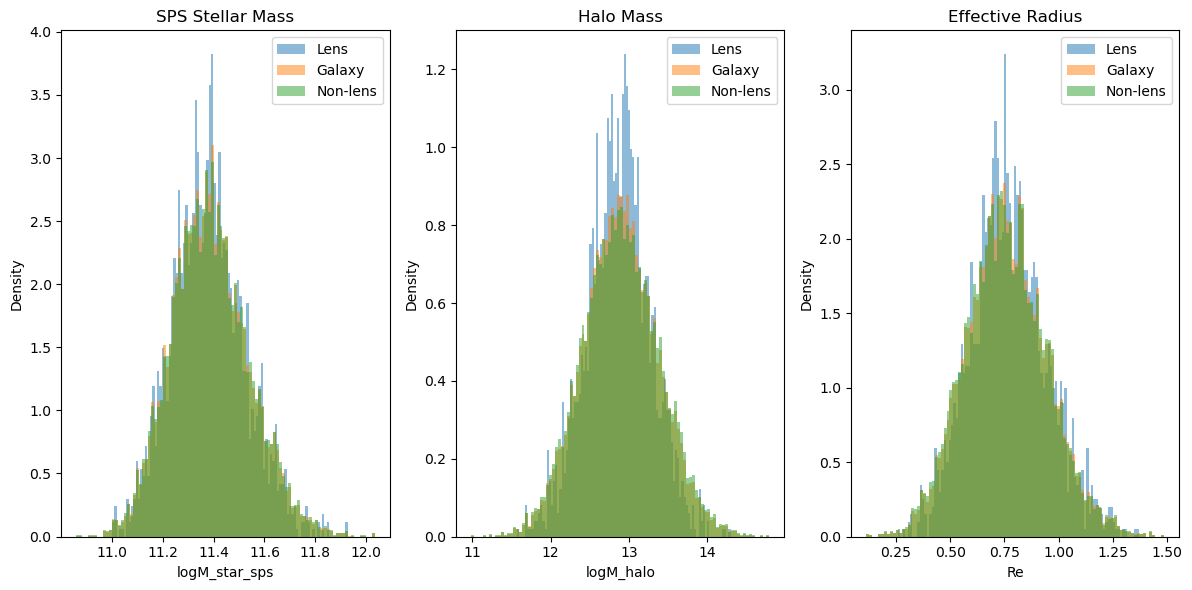

In [25]:
M_sps_lens = mock_lens_data["logM_star_sps"]
M_sps_galaxy = df_lens["logM_star_sps"]
M_sps_nonlens = nonlens["logM_star_sps"]

M_halo_lens = mock_lens_data["logM_halo"]
M_halo_galaxy = df_lens["logM_halo"]
M_halo_nonlens = nonlens["logM_halo"]


Re = mock_lens_data["logRe"]
Re_galaxy = df_lens["logRe"]
Re_nonlens = nonlens["logRe"]


fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# hist compare
axes[0].hist(M_sps_lens, bins=100, alpha=0.5, label='Lens', density=True)
axes[0].hist(M_sps_galaxy, bins=100, alpha=0.5, label='Galaxy', density=True)
axes[0].hist(M_sps_nonlens, bins=100, alpha=0.5, label='Non-lens', density=True)
axes[0].set_xlabel('logM_star_sps')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].set_title('SPS Stellar Mass')

axes[1].hist(M_halo_lens, bins=100, alpha=0.5, label='Lens', density=True)
axes[1].hist(M_halo_galaxy, bins=100, alpha=0.5, label='Galaxy', density=True)
axes[1].hist(M_halo_nonlens, bins=100, alpha=0.5, label='Non-lens', density=True)
axes[1].set_xlabel('logM_halo')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].set_title('Halo Mass')

axes[2].hist(Re, bins=100, alpha=0.5, label='Lens', density=True)
axes[2].hist(Re_galaxy, bins=100, alpha=0.5, label='Galaxy', density=True)
axes[2].hist(Re_nonlens, bins=100, alpha=0.5, label='Non-lens', density=True)
axes[2].set_xlabel('Re')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].set_title('Effective Radius')

plt.tight_layout()
plt.show()

In [24]:
nonlens = df_lens[df_lens["is_lensed"] == 0]

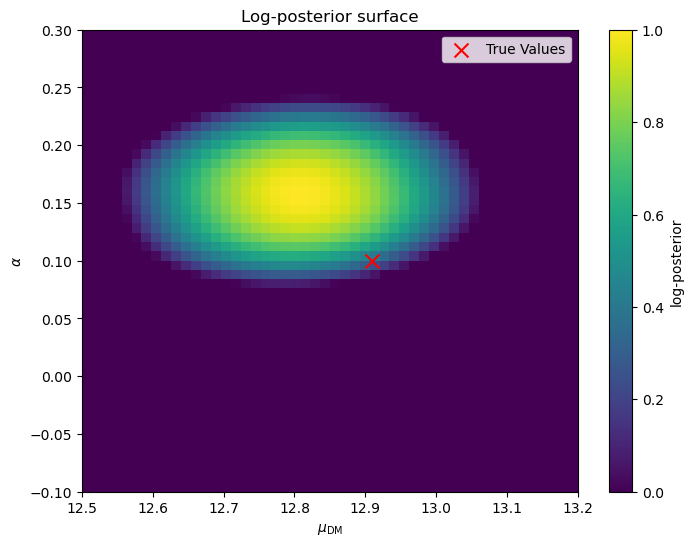

In [38]:
plt.figure(figsize=(8, 6))
plt.imshow(
    logL.T,
    origin='lower',
    extent=[muDM_values.min(), muDM_values.max(), alpha_values.min(), alpha_values.max()],
    vmax=np.max(logL),
    vmin=np.max(logL) - 10,
    aspect='auto',
    cmap='viridis'
)
plt.scatter([12.91], [logalpha], color='red', marker='x', s=100, label='True Values')
plt.colorbar(label='log-posterior')
plt.xlabel(r'$\mu_{\rm DM}$')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.title('Log-posterior surface')
plt.show()

Processing lenses: 100%|██████████| 300/300 [00:01<00:00, 277.83it/s]
/Users/shuo/Github/sl_inference_only_muDMalpha/test_notebook/../../sl_inference_only_muDMalpha/mock_generator/lens_solver.py:72: RuntimeWarning: invalid value encountered in log10
  logM_star_solved = np.log10(M_star_solved)  # [Msun]
Computing logL grid: 100%|██████████| 2500/2500 [00:07<00:00, 318.87it/s]


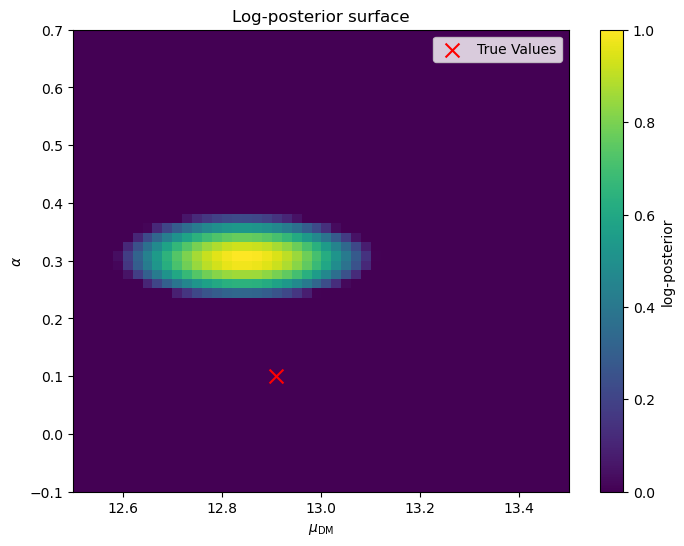

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
import sys
sys.path.append("../..")
import sl_inference_only_muDMalpha as sl
from sl_inference_only_muDMalpha.likelihood import log_posterior, precompute_grids
from sl_inference_only_muDMalpha.config import SCATTER
from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation

# 1. 固定 mock 数据
logalpha = 0.1
mock_lens_data, mock_observed_data = run_mock_simulation(300, logalpha=logalpha, seed=42)
logM_sps_obs = mock_observed_data["logM_star_sps_observed"].values

# 2. 预计算 grids
logMh_grid = np.linspace(11.0, 15.0, 100)
grids = precompute_grids(mock_observed_data, logMh_grid, sigma_m=SCATTER.mag)

# 3. 定义网格范围
muDM_values = np.linspace(12.5, 13.5, 50)
alpha_values = np.linspace(-0.1, 0.7, 50)

# 4. 并行计算 log-likelihood（不加先验）
param_grid = [(mu, a) for mu in muDM_values for a in alpha_values]
results = Parallel(n_jobs=8)(
    delayed(log_posterior)([mu, a], grids, logM_sps_obs) 
    for mu, a in tqdm(param_grid, desc="Computing logL grid")
)

logL = np.array(results).reshape(len(muDM_values), len(alpha_values))

# 5. 画热力图
plt.figure(figsize=(8, 6))
plt.imshow(
    logL.T,
    origin='lower',
    extent=[muDM_values.min(), muDM_values.max(), alpha_values.min(), alpha_values.max()],
    vmax=np.max(logL),
    vmin=np.max(logL) - 10,
    aspect='auto',
    cmap='viridis'
)
plt.scatter([12.91], [logalpha], color='red', marker='x', s=100, label='True Values')
plt.colorbar(label='log-posterior')
plt.xlabel(r'$\mu_{\rm DM}$')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.title('Log-posterior surface')
plt.show()


Processing lenses: 100%|██████████| 300/300 [00:01<00:00, 276.22it/s]
/Users/shuo/Github/sl_inference_only_muDMalpha/test_notebook/../../sl_inference_only_muDMalpha/mock_generator/lens_solver.py:72: RuntimeWarning: invalid value encountered in log10
  logM_star_solved = np.log10(M_star_solved)  # [Msun]
Computing logL grid: 100%|██████████| 2500/2500 [00:08<00:00, 298.51it/s]


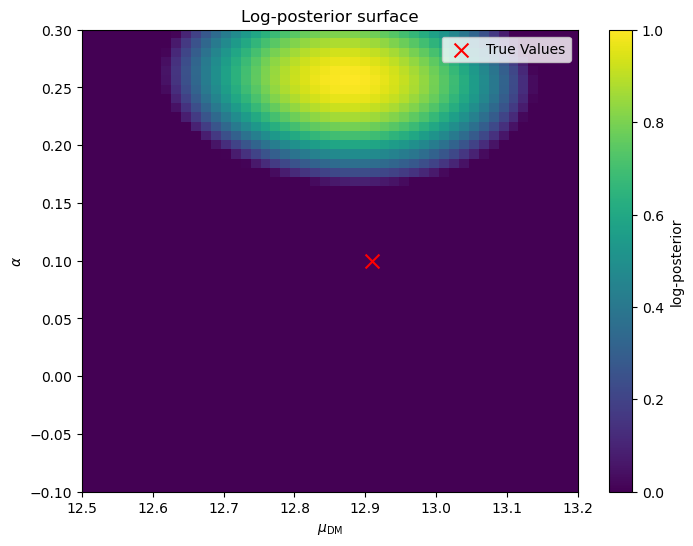

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
import sys
sys.path.append("../..")
import sl_inference_only_muDMalpha as sl
from sl_inference_only_muDMalpha.likelihood import log_posterior, precompute_grids
from sl_inference_only_muDMalpha.config import SCATTER
from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation

# 1. 固定 mock 数据
logalpha = 0.1
mock_lens_data, mock_observed_data = run_mock_simulation(300, logalpha=logalpha, seed=42)
logM_sps_obs = mock_observed_data["logM_star_sps_observed"].values

# 2. 预计算 grids
logMh_grid = np.linspace(11.5, 14.0, 100)
grids = precompute_grids(mock_observed_data, logMh_grid, sigma_m=SCATTER.mag)

# 3. 定义网格范围
muDM_values = np.linspace(12.5, 13.2, 50)
alpha_values = np.linspace(-0.1, 0.3, 50)

# 4. 并行计算 log-likelihood（不加先验）
param_grid = [(mu, a) for mu in muDM_values for a in alpha_values]
results = Parallel(n_jobs=8)(
    delayed(log_posterior)([mu, a], grids, logM_sps_obs) 
    for mu, a in tqdm(param_grid, desc="Computing logL grid")
)

logL = np.array(results).reshape(len(muDM_values), len(alpha_values))

# 5. 画热力图
plt.figure(figsize=(8, 6))
plt.imshow(
    logL.T,
    origin='lower',
    extent=[muDM_values.min(), muDM_values.max(), alpha_values.min(), alpha_values.max()],
    vmax=np.max(logL),
    vmin=np.max(logL) - 10,
    aspect='auto',
    cmap='viridis'
)
plt.scatter([12.91], [logalpha], color='red', marker='x', s=100, label='True Values')
plt.colorbar(label='log-posterior')
plt.xlabel(r'$\mu_{\rm DM}$')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.title('Log-posterior surface')
plt.show()


In [11]:
from sl_inference_only_muDMalpha.mock_generator.lens_model import LensModel
from sl_inference_only_muDMalpha.mock_generator.mass_sampler import generate_samples
from sl_inference_only_muDMalpha.mock_generator.lens_solver import solve_single_lens
import pandas as pd

In [15]:
n_samples = 100000
alpha_s=-1.3,
m_s_star=24.5,
seed = 42
beta_samp = np.random.rand(n_samples)**0.5
logalpha_sps_sample = np.full(n_samples, logalpha)
samples = generate_samples(n_samples, random_state=seed)


lens_results = []
for i in tqdm(range(n_samples), desc="Processing lenses"):
    input_df = pd.DataFrame({
        'logM_star_sps': [samples['logM_star_sps'][i]],
        'logM_star': [samples['logM_star_sps'][i] + logalpha_sps_sample[i]],
        'logM_halo': [samples['logMh'][i]],
        'logRe': [samples['logRe'][i]],
        'beta_unit': [beta_samp[i]],
        'm_s': [samples['m_s'][i]],
        'maximum_magnitude': [26.5],
        'logalpha_sps': [logalpha_sps_sample[i]],
        'zl': [0.3],
        'zs': [2.0]
    })
    model = LensModel(logM_star=input_df['logM_star'][0], logM_halo=input_df['logM_halo'][0], logRe=input_df['logRe'][0], zl=input_df['zl'][0], zs=input_df['zs'][0])
    xA,xB = solve_single_lens(model,beta_unit=input_df['beta_unit'][0])
    lens_results.append({'xA': xA, 'xB': xB})




Processing lenses: 100%|██████████| 100000/100000 [08:05<00:00, 205.87it/s] 


In [17]:
pd.DataFrame(lens_results)

,xA,xB
0,20.437810,-11.703163
1,15.254367,-3.038865
2,23.786502,-19.241542
3,18.570611,-7.314142
4,15.686635,-3.133795
...,...,...
99995,16.359033,-4.959798
99996,38.951290,-17.692598
99997,163.382651,-40.405107
99998,10.096934,-1.689987


In [18]:
df = pd.DataFrame(lens_results)

# True 表示该位置是 None 或 NaN
mask = df.isna()

# 如果想看有多少个缺失值
print(mask.sum())   # 每列缺失值个数
print(mask.sum().sum())  # 全部缺失值总数


xA    0
xB    0
dtype: int64
0


Processing lenses: 100%|██████████| 100/100 [00:00<00:00, 275.13it/s]
50it [00:11,  4.20it/s]


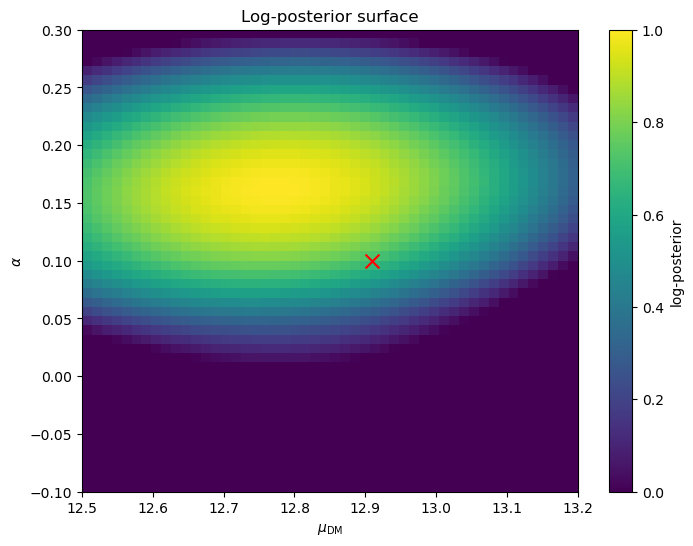

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sl_inference_only_muDMalpha.likelihood import log_posterior
from sl_inference_only_muDMalpha.likelihood import precompute_grids
from sl_inference_only_muDMalpha.config import SCATTER
from sl_inference_only_muDMalpha.mock_generator.mock_generator import run_mock_simulation
from tqdm import tqdm
# 1. 固定 mock 数据


logalpha = 0.1
mock_lens_data, mock_observed_data = run_mock_simulation(100, logalpha=logalpha)
logM_sps_obs = mock_observed_data["logM_star_sps_observed"].values

# 2. 预计算 grids
logMh_grid = np.linspace(11.5, 14.0, 100)
grids = precompute_grids(mock_observed_data, logMh_grid, sigma_m=SCATTER.mag)

# 3. 定义网格范围
muDM_values = np.linspace(12.5, 13.5, 50)
alpha_values = np.linspace(-0.1, 0.3, 50)
logL = np.zeros((len(muDM_values), len(alpha_values)))

# 4. 计算 log-likelihood（这里不加先验）
for i, muDM in tqdm(enumerate(muDM_values)):
    for j, alpha in enumerate(alpha_values):
        logL[i, j] = log_posterior([muDM, alpha], grids, logM_sps_obs)


#并行


# 5. 画热力图
# 5. 画热力图
plt.figure(figsize=(8,6))
plt.imshow(logL.T, origin='lower', 
           extent=[muDM_values.min(), muDM_values.max(), alpha_values.min(), alpha_values.max()],
           vmax=np.max(logL),vmin= np.max(logL)-10,
           aspect='auto', cmap='viridis')
plt.scatter([12.91], [logalpha], color='red', marker='x', s=100, label='True Values')
plt.colorbar(label='log-posterior')
plt.xlabel(r'$\mu_{\rm DM}$')
plt.ylabel(r'$\alpha$')
plt.title('Log-posterior surface')
plt.show()


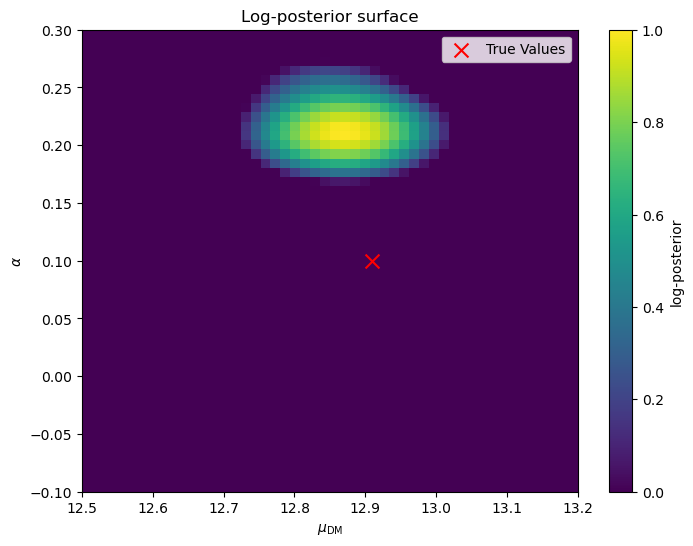

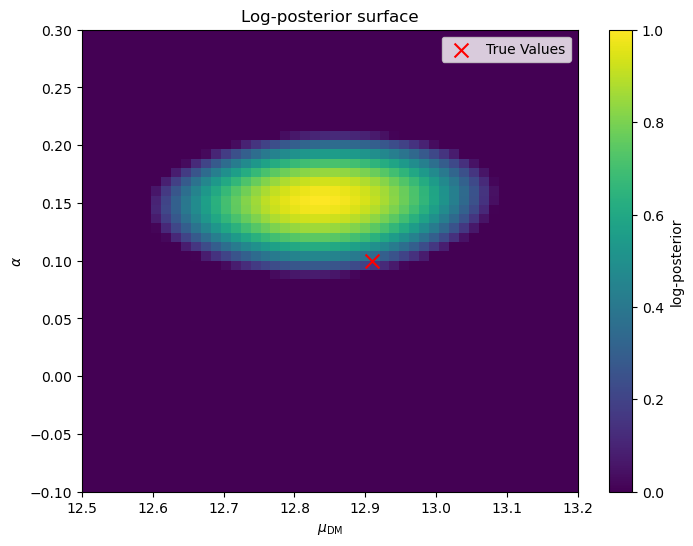

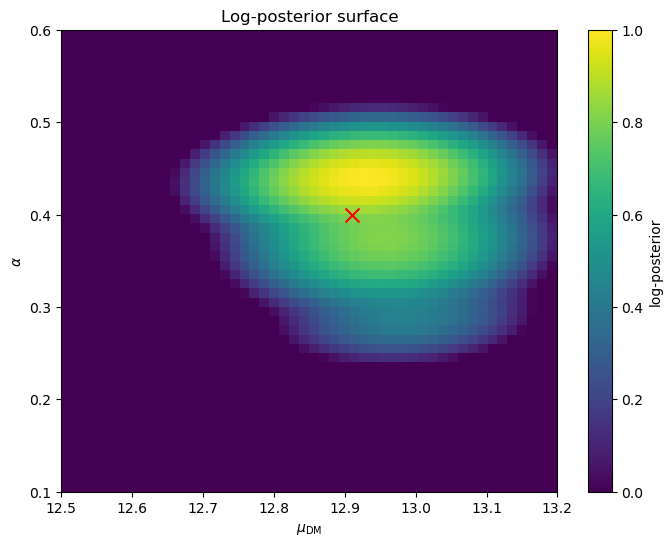

In [31]:

# 5. 画热力图
plt.figure(figsize=(8,6))
plt.imshow(logL.T, origin='lower', 
           extent=[muDM_values.min(), muDM_values.max(), alpha_values.min(), alpha_values.max()],
           vmax=np.max(logL),vmin= np.max(logL)-10,
           aspect='auto', cmap='viridis')
plt.scatter([12.91], [0.4], color='red', marker='x', s=100, label='True Values')
plt.colorbar(label='log-posterior')
plt.xlabel(r'$\mu_{\rm DM}$')
plt.ylabel(r'$\alpha$')
plt.title('Log-posterior surface')
plt.show()

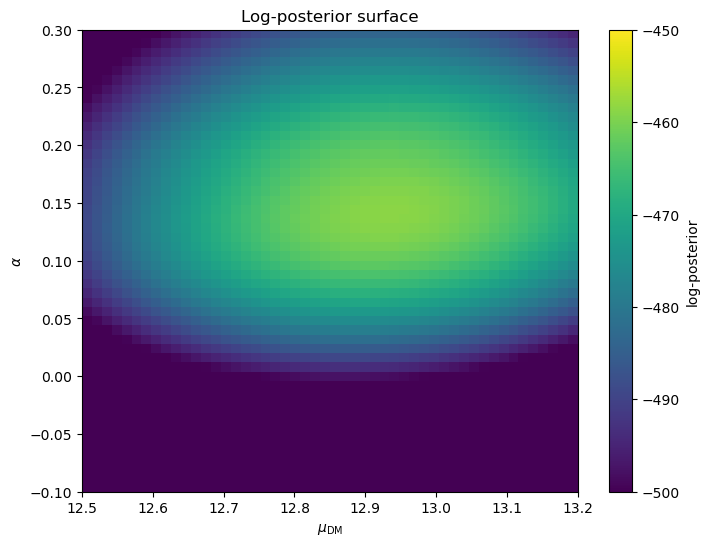

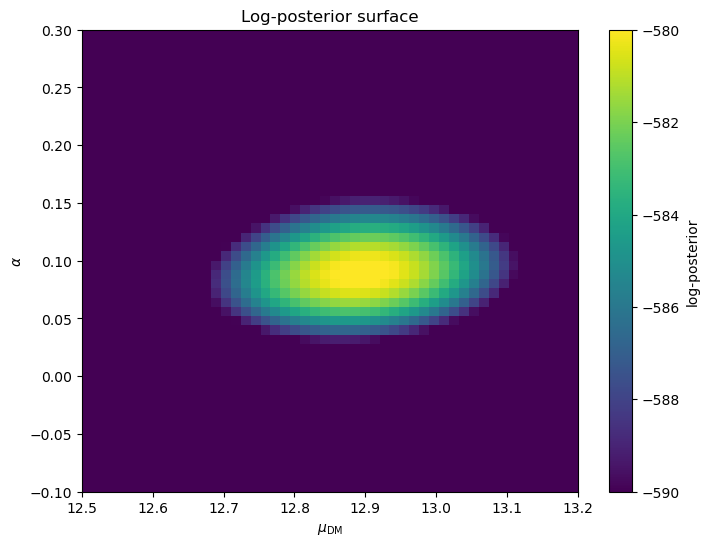